In [2]:
# Import packages and datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
# Combine datasets
all_data = pd.concat([train, test], ignore_index=True)

In [2]:
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

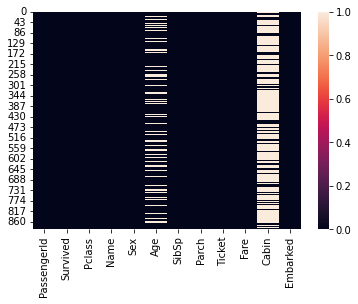

In [3]:
sns.heatmap(train.isnull())


In [4]:
# Overview
all = train['Survived'].value_counts()
rate_all = all / len(train)
print(rate_all)


0    0.616162
1    0.383838
Name: Survived, dtype: float64


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

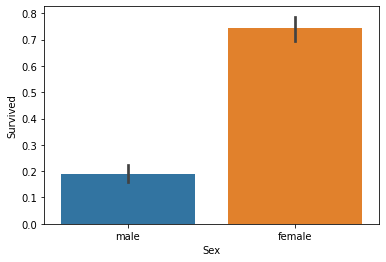

In [5]:
# Gender
sns.barplot(x='Sex', y='Survived', data=train)


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

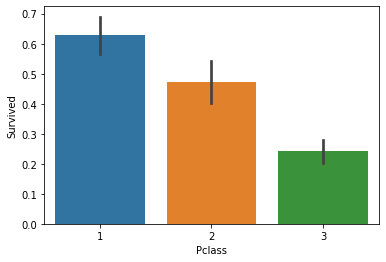

In [6]:
# Pclass
sns.barplot(x='Pclass', y='Survived', data=train)


Text(28.04088541666667, 0.5, 'Probability')

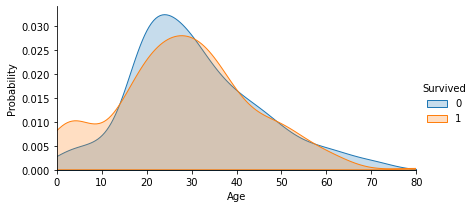

In [7]:
# Age
facet = sns.FacetGrid(train, hue='Survived', aspect=2)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlabel('Age')
plt.ylabel('Probability')


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

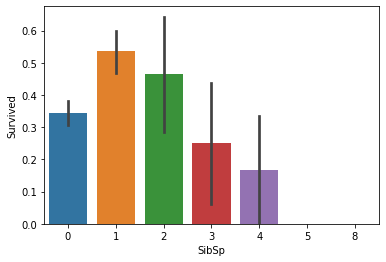

In [8]:
# Siblings and Spouse
sns.barplot(x='SibSp', y='Survived', data=train)


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

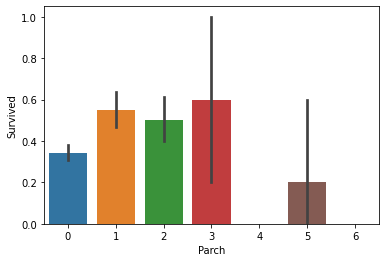

In [9]:
# Parents and Children
sns.barplot(x='Parch', y='Survived', data=train)


<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

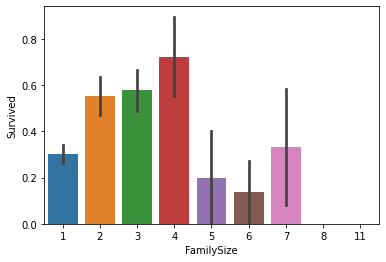

In [10]:
# Family Scale
# Family Members Distribution
all_data['FamilySize'] = all_data['Parch'] + all_data['SibSp'] + 1
sns.barplot(x="FamilySize", y="Survived", data=all_data)

<AxesSubplot:xlabel='FamilyScale', ylabel='Survived'>

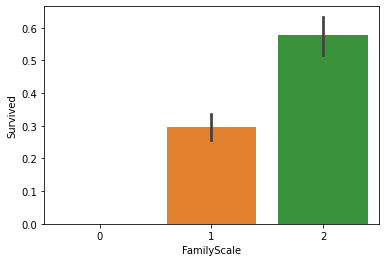

In [11]:
# Divided into 3 type of Family
def FamilyScale(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 7)) | (s == 1):
        return 1
    elif (s > 7):
        return 0
all_data['FamilyScale'] = all_data['FamilySize'].apply(FamilyScale)
sns.barplot(x="FamilyScale", y="Survived", data=all_data)


/Users/muuu/Desktop/East China University of Science and Technology/课件/Pattern Recognition and Statical Learning/Cases/Titanic/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

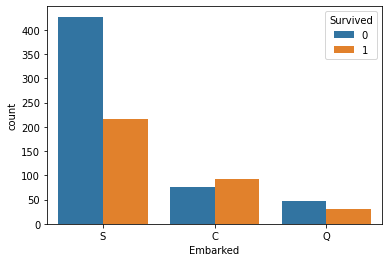

In [12]:
# Embarked
sns.countplot('Embarked',hue='Survived',data=train)


In [13]:
# Name
# Get Title
all_data['Title'] = all_data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
all_data.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title', ylabel='Survived'>

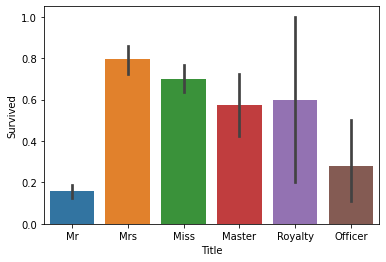

In [4]:
# Create new column Title
all_data['Title'] = all_data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
Title_Dict = {}
Title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
Title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
Title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
Title_Dict.update(dict.fromkeys(['Master'], 'Master'))
Title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
Title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady', 'Jonkheer'], 'Royalty'))
all_data['Title'] = all_data['Title'].map(Title_Dict)
sns.barplot(x="Title", y="Survived", data=all_data)


<AxesSubplot:xlabel='TicketGroup', ylabel='Survived'>

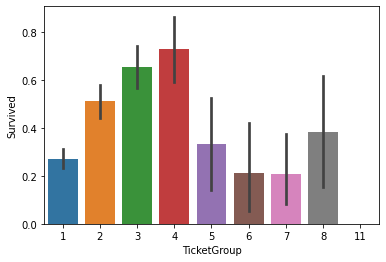

In [15]:
# Ticket
Ticket_Count = dict(all_data['Ticket'].value_counts())
all_data['TicketGroup'] = all_data['Ticket'].apply(lambda x: Ticket_Count[x])
sns.barplot(x='TicketGroup', y='Survived', data=all_data)

<AxesSubplot:xlabel='TicketGroup', ylabel='Survived'>

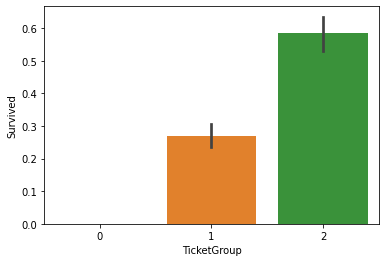

In [16]:
# Divided into 3 groups
def Ticket_Label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 8)) | (s == 1):
        return 1
    elif (s > 8):
        return 0
all_data['TicketGroup'] = all_data['TicketGroup'].apply(Ticket_Label)
sns.barplot(x='TicketGroup', y='Survived', data=all_data)


Text(26.539872685185195, 0.5, 'Probability')

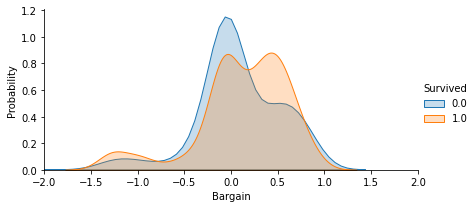

In [110]:

# Fare
# Get Medium Fare of Each Pclass
P1med = all_data['Fare'].where(all_data['Pclass'] == 1).median()
P2med = all_data['Fare'].where(all_data['Pclass'] == 2).median()
P3med = all_data['Fare'].where(all_data['Pclass'] == 3).median()
# Compute the ability of bargain of each class
all_data['Bargain1'] = (all_data['Fare'].where(all_data['Pclass'] == 1) - P1med) / all_data['Fare'].where(all_data['Pclass'] == 1)
all_data['Bargain2'] = (all_data['Fare'].where(all_data['Pclass'] == 2) - P2med) / all_data['Fare'].where(all_data['Pclass'] == 2)
all_data['Bargain3'] = (all_data['Fare'].where(all_data['Pclass'] == 3) - P3med) / all_data['Fare'].where(all_data['Pclass'] == 3)
# Put them together
all_data['Bargain'] = all_data['Bargain1']
all_data['Bargain'] = all_data['Bargain'].fillna(all_data['Bargain2'])
all_data['Bargain'] = all_data['Bargain'].fillna(all_data['Bargain3'])
all_data['Bargain']
# Plot
facet = sns.FacetGrid(all_data, hue='Survived', aspect=2)
facet.map(sns.kdeplot, 'Bargain', shade=True)
facet.set(xlim=(-2, 2))
facet.add_legend()
plt.xlabel('Bargain')
plt.ylabel('Probability')

